C:\Users\user\AppData\Local\Temp\ipykernel_33816\1832996273.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft = yf.download("MSFT", start="2024-01-01", end="2024-12-31", interval="1d")
[*********************100%***********************]  1 of 1 completed


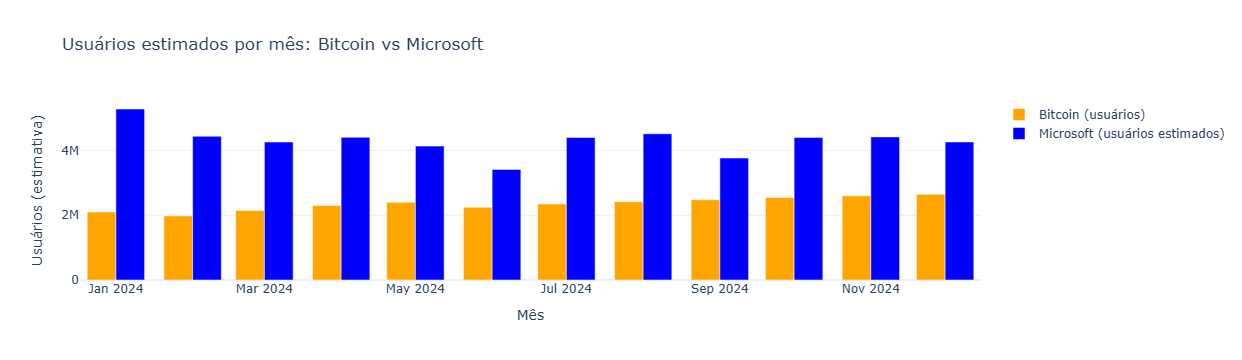

In [1]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Baixar volume de ações da Microsoft
msft = yf.download("MSFT", start="2024-01-01", end="2024-12-31", interval="1d")
msft['Month'] = msft.index.to_period('M')
msft_monthly = msft.groupby('Month')['Volume'].sum().reset_index()
msft_monthly['Month'] = msft_monthly['Month'].astype(str)

# Estimar número de investidores de MSFT
# Supondo que cada investidor compre em média 100 ações por mês
msft_monthly['MSFT Compradores Estimados'] = msft_monthly['Volume'] // 100

# Simular número de usuários únicos comprando Bitcoin por mês
# Dados baseados em estimativas históricas médias de endereços ativos
btc_users_simulados = [2_100_000, 1_980_000, 2_150_000, 2_300_000, 2_400_000,
                       2_250_000, 2_350_000, 2_420_000, 2_480_000, 2_550_000,
                       2_600_000, 2_650_000]

# Ajustar tamanho da lista se msft_monthly tiver menos de 12 meses
btc_users_simulados = btc_users_simulados[:len(msft_monthly)]
msft_monthly['BTC Compradores Estimados'] = btc_users_simulados

# Gráfico
fig = go.Figure()
fig.add_trace(go.Bar(
    x=msft_monthly['Month'],
    y=msft_monthly['BTC Compradores Estimados'],
    name='Bitcoin (usuários)',
    marker_color='orange'
))
fig.add_trace(go.Bar(
    x=msft_monthly['Month'],
    y=msft_monthly['MSFT Compradores Estimados'],
    name='Microsoft (usuários estimados)',
    marker_color='blue'
))

fig.update_layout(
    title='Usuários estimados por mês: Bitcoin vs Microsoft',
    xaxis_title='Mês',
    yaxis_title='Usuários (estimativa)',
    barmode='group',
    template='plotly_white'
)

fig.show()
